In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
os. getcwd()

'D:\\Projects\\SudokuSolvers\\src\\statistics_data'

In [2]:
heuristics =['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS']
sizes = ['4x4', '9x9']
for size in sizes:
    for heuristic in heuristics:
        filename = size+'/'+heuristic+'.csv'
        df = pd.read_csv(filename)
        #print(df)
        print(size + ' ',heuristic + ' mean time: ',df['Time'].mean(), ' branches: ',df['Branches'].mean())
    print('-------------------')
    
filename = '9x9'+'/'+'VSIDS'+'.csv'
df = pd.read_csv(filename)
df.sort_values(by=["Time"]) ## yikes.

4x4  None mean time:  0.0027707149982452  branches:  0.0
4x4  DLCS mean time:  0.002700836896896323  branches:  0.0
4x4  DLISN mean time:  0.0032182950973510312  branches:  0.0
4x4  DLISP mean time:  0.002826662778854349  branches:  0.0
4x4  MOMS mean time:  0.002760466098785382  branches:  0.0
4x4  VSIDS mean time:  0.00407886314392087  branches:  0.0
-------------------
9x9  None mean time:  0.6703439130783081  branches:  3.892
9x9  DLCS mean time:  1.1164331886768342  branches:  123.877
9x9  DLISN mean time:  0.9898407735824585  branches:  79.485
9x9  DLISP mean time:  0.6643650755882263  branches:  4.542
9x9  MOMS mean time:  0.6564850664138794  branches:  3.429
9x9  VSIDS mean time:  1.0937753694057464  branches:  8.71
-------------------


,Unnamed: 0,start Length,Time,Branches,Unit clauses removed,Pure clauses removed
30,30,23,0.951313,2,12003,0
186,186,24,0.952856,0,12012,0
0,0,21,0.952997,2,11998,0
31,31,23,0.962221,1,12006,0
461,461,25,0.965078,5,11962,0
...,...,...,...,...,...,...
550,550,25,2.327664,180,13554,0
660,660,25,2.685908,224,16475,0
558,558,25,3.018468,134,17311,0
679,679,23,4.051868,272,18533,0


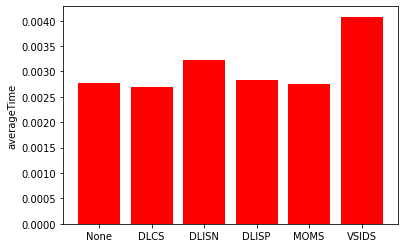

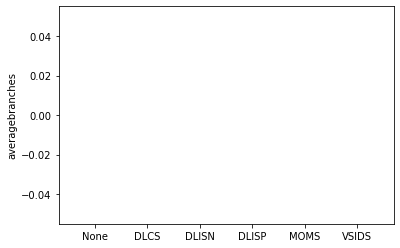

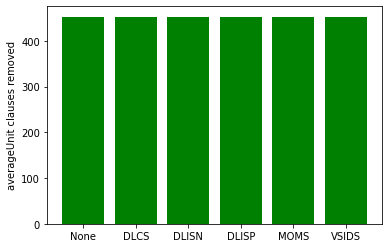

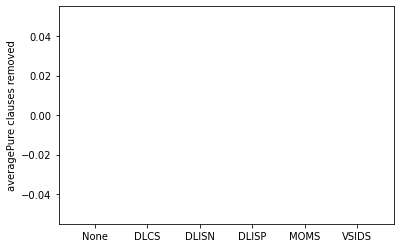

In [3]:
def makebarplots(sudokuSize=9, time=[], branches=[],unitCRemoved=[],pureCRemoved=[],
                   colors = ['red', 'cyan', 'green', 'purple'],
                   elementNames = ['Time', 'branches', 'Unit clauses removed', 'Pure clauses removed'],
                   heuristics =['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS']
                   ):
    elements = [time, branches, unitCRemoved, pureCRemoved]
    for heuristic in heuristics:
        if(sudokuSize == 9):
            df = pd.read_csv('9x9/'+heuristic+'.csv')
        elif(sudokuSize == 4):
            df = pd.read_csv('4x4/'+heuristic+'.csv')
        time.append(df["Time"].mean())
        branches.append(df["Branches"].mean())
        unitCRemoved.append(df["Unit clauses removed"].mean())
        pureCRemoved.append(df["Pure clauses removed"].mean())
    for element, name, color in zip(elements, elementNames, colors):
        fig, ax = plt.subplots()
        ax.set_ylabel('average'+name)
        plt.bar(heuristics, element, color=color)
        plt.show() 
        
makebarplots(sudokuSize=4) ## if you call this function from another cell it's broken
                           ## also calling it twice at once breaks it, idk man something with matplotlib


['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.6703439130783081, 1.1164331886768342, 0.9898407735824585, 0.6643650755882263, 0.6564850664138794, 1.0937753694057464]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [3.892, 123.877, 79.485, 4.542, 3.429, 8.71]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [12166.522, 12426.335, 12431.753, 12190.224, 12202.332, 12190.384]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


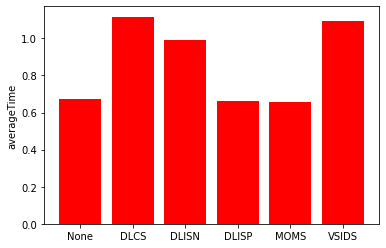

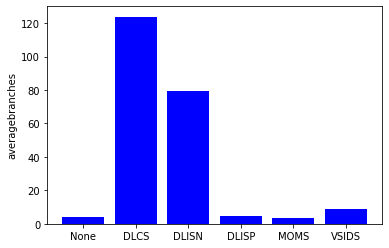

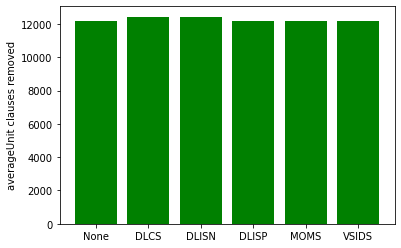

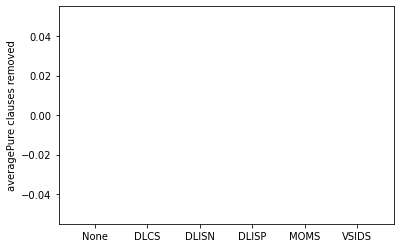

['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.0027707149982452, 0.002700836896896323, 0.0032182950973510312, 0.002826662778854349, 0.002760466098785382, 0.00407886314392087]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [452.934, 452.934, 452.934, 452.934, 452.934, 452.934]
['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS'] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


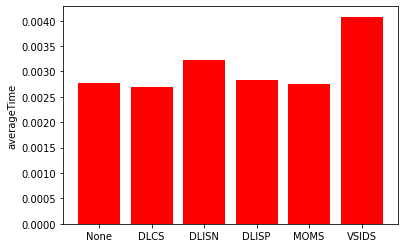

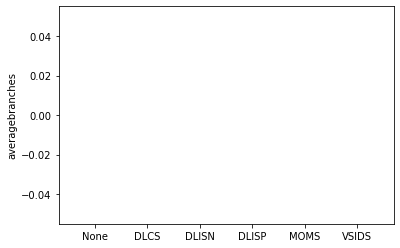

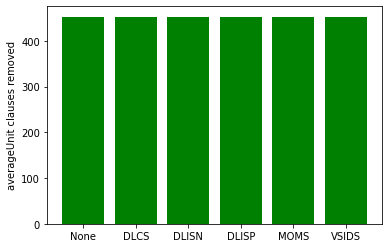

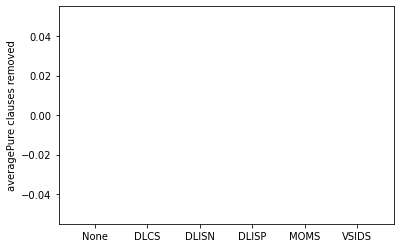

In [4]:
colors = ['red', 'blue', 'green', 'purple']
elementNames = ['Time', 'branches', 'Unit clauses removed', 'Pure clauses removed']
heuristics =['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS']


sizes = ['9x9','4x4']
for size in sizes:
    time=[]
    branches=[]
    unitCRemoved=[]
    pureCRemoved=[]
    elements = [time, branches, unitCRemoved, pureCRemoved]
    for heuristic in heuristics:
        filename = size+'/'+heuristic+'.csv'
        df = pd.read_csv(filename)
        time.append(df["Time"].mean())
        branches.append(df["Branches"].mean())
        unitCRemoved.append(df["Unit clauses removed"].mean())
        pureCRemoved.append(df["Pure clauses removed"].mean())
    for element, name, color in zip(elements, elementNames, colors):
        fig, ax = plt.subplots()
        ax.set_ylabel('average'+name)
        print(heuristics, element)
        plt.bar(heuristics, element, color=color)
    plt.show() 

Text(0, 0.5, 'Time (s)')

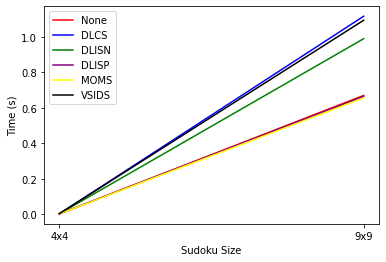

In [5]:
heuristics =['None', 'DLCS', 'DLISN', 'DLISP', 'MOMS', 'VSIDS']
sizes = ['4x4', '9x9']
colors = ['red', 'blue', 'green', 'purple', 'yellow', 'black']

f, ax = plt.subplots()

for i in range(len(heuristics)):
        filename_1 = sizes[0]+'/'+heuristics[i]+'.csv'
        df_1 = pd.read_csv(filename_1)
        filename_2 = sizes[1]+'/'+heuristics[i]+'.csv'
        df_2 = pd.read_csv(filename_2)
        time = []
        time.append(df_1['Time'].mean())
        time.append(df_2['Time'].mean())
        l=[1,2]
        plt.plot(l, time, colors[i], label=heuristics[i])
        ax.set_xticks(l)
        ax.set_xticklabels(sizes)
ax.legend(loc='upper left')
plt.xlabel('Sudoku Size')
plt.ylabel('Time (s)')